In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Assign initial conditions

In [2]:
sigma0 = 0.1e9    # initial external, axial stress [Pa]
sigma_athm= 5.2e9  # Athermal stress in SN model (σ0 )
D = 800e-9         # m
T = 300            # modelling temp [K]
Tm = 700           #  Surface disordering temperature (T 0 ) [K]
b =   0.256e-9     # Burger's vector [m]
M = 0.4082         # Schmid factor
beta = 0.5         # factor to account for the effective slip plane area. 
epsilon_dot =  1e-5 # axial loading strain rate [s^-1]
alpha = 4.1        # fitting exponent for activation energy
A = 4.8            # fitting factor for activation energy
theta=np.arccos(1/np.sqrt(3)) # angle between slip plane normal and loading axis
shear_modulus = 48e9  # [Pa]
poisson_ratio = 0.34

B = 2e-5               # drag coefficient [Pa*s]
rho0 = 8.9e3           # mass density [kg/m^3]
nu0 =  1e13            # attempt frequency [s^-1]
kB =  1.38064852e-23   # Boltzmann constant in J/K
#Q                    # activation free energy of dislocation nucleation from the free surface
Sc = D ** 2 / np.cos(theta) # maximum area of slip planes

H = 2 * D  
V =  H * D ** 2              # sample volume [m^3]
S =  H * D * 4+ 2*D**2  # surface area of the sample


## 2. Calculate plastic strain increment 

In [3]:
def get_delta_gamma(beta, b, Sc, V):
    # eq. 2
    return beta * b * Sc / V

def time_span(delta_epsilon_pl, epsilon_dot):
    # eq. 3
    return delta_epsilon_pl / epsilon_dot

def axial_plasti_strain_increment(delta_gamma, M):
    return delta_gamma * M

delta_gamma = get_delta_gamma(beta, b, Sc, V)
delta_epsilon_pl = axial_plasti_strain_increment(delta_gamma, M)

### 3. Calculate $t_{life}$

In [4]:
t_life = delta_epsilon_pl / epsilon_dot

### 4. Evaluate the surface nucleation probability

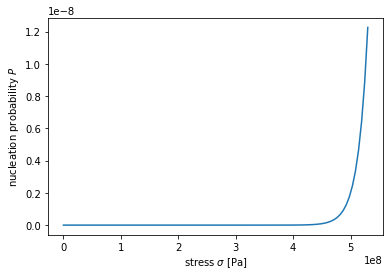

In [5]:
def activation_energy(sigma, T, Tm, A, sigma_athm, alpha):
    """Returns the energy in J"""
    eV_to_J = 1.602176565e-19
    Q0 = eV_to_J * A * (1 - sigma / sigma_athm) ** alpha
    return (1 - T / Tm) * Q0

def surface_nucleation_probability(nu0, Q, T, S, b, delta_t):
    # eq. 1
    # S/b^2: potential number of SN sites (used to be "N")
    p = nu0 * np.exp(- Q / (kB * T)) * (S / b**2) * delta_t
    return p

#sigma = 4*sigma0
#Q = activation_energy(sigma, T, Tm, A, sigma_athm, alpha)
#P = surface_nucleation_probability(nu0, Q, T, S, b, t_life)

sigma = np.linspace(0., 5.3, 100) * sigma0
all_Q = activation_energy(sigma, T, Tm, A, sigma_athm, alpha)
all_P = surface_nucleation_probability(nu0, all_Q, T, S, b, t_life)

fig, ax = plt.subplots()
ax.plot(sigma, all_P)
ax.set(xlabel=r"stress $\sigma$ [Pa]", ylabel=r"nucleation probability $P$");

In [6]:
max_sigma = 3e9  # maximum axial stress [Pa]
number_of_load_increments = 20000
delta_sigma = max_sigma / number_of_load_increments

accumulated_probability = 0.
for sigma in np.arange(sigma0, max_sigma, delta_sigma):
    Q = activation_energy(sigma, T, Tm, A, sigma_athm, alpha)
    p = surface_nucleation_probability(nu0, Q, T, S, b, t_life)
    accumulated_probability += p
    if p >= 1:
        break
print(f"yield stress = {sigma * 1e-9:5.3f} [GPa]")

yield stress = 0.871 [GPa]
